# Stack Overflow Developer Survey 2025 – Data Analysis

This project analyzes the Stack Overflow Developer Survey 2025 dataset using
Python, Pandas, and Matplotlib.

## Objectives
- Understand developer demographics
- Analyze salary distribution
- Study technology popularity
- Explore relationships between experience, age, and salary


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## 1. Data Loading and Initial Setup
We begin by loading the survey dataset and setting a proper index for analysis.


In [2]:
df = pd.read_csv("survey_results_public_2025.csv")
schema_df = pd.read_csv("survey_results_schema_2025.csv")

C:\Users\Ayon\AppData\Local\Temp\ipykernel_22616\2993466501.py:1: DtypeWarning: Columns (56,74,92,97,98,105,109,110,132,162,165) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("survey_results_public_2025.csv")


## 2. Basic Exploration
In this section, we explore the dataset to understand the number of responses,
countries, and overall participant distribution.


In [3]:
df.head(5)

,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,...,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,Vertex AI,NaN,NaN,NaN,ChatGPT,NaN,When I don’t trust AI’s answers,"Troubleshooting, profiling, debugging",61256.0,10.0
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,NaN,2.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers;When I want to...,All skills. AI is a flop.,104413.0,9.0
2,3,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",None of the above,10.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code;GitHub Copilot;Google Gemini,NaN,When I don’t trust AI’s answers;When I want to...,"Understand how things actually work, problem s...",53061.0,8.0
3,4,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,None of the above,4.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code,NaN,When I don’t trust AI’s answers;When I want to...,NaN,36197.0,6.0
4,5,I am a developer by profession,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Caring for dependents (children, elderly, etc.)",21.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers,"critical thinking, the skill to define the tas...",60000.0,7.0


In [4]:
df.set_index('ResponseId', inplace= True)

In [5]:
schema_df.head(5)

,qid,qname,question,force_resp,type,selector
0,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
1,QID127,Age,What is your age?*,True,MC,SAVR
2,QID296,Employment,Which of the following best describes your cur...,True,MC,MAVR
3,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
4,QID341,Check,Just checking to make sure you are paying atte...,True,MC,SAVR


In [6]:
print("Total number of participants are: ",list(df.shape)[0])

Total number of participants are:  49191


In [7]:
print("The most participated country is: ", df['Country'].value_counts(ascending=False).idxmax())

The most participated country is:  United States of America


In [8]:
print("The most use languages are: ", ", ".join(re.split(r"[;/]", df['LanguageHaveWorkedWith'].value_counts().idxmax())))

The most use languages are:  HTML, CSS, JavaScript, TypeScript


In [9]:
print("The avarage woke experience is: ", df["WorkExp"].mean())

The avarage woke experience is:  13.367402606485907


In [10]:
def string_to_age(x):
    nums = re.findall(r"\d+", x)
    if(len(nums) == 2):
        return(float(nums[0])+ float(nums[1])/2)
    elif(len(nums) == 1):
        return float(nums[0])
    return np.nan
df["Age"] = df["Age"].apply(string_to_age)

In [11]:
print("The number of senior developer is: ", df[df["Age"] >= 40]["Age"].value_counts().sum())
print("The number of junior developer is: ", df[df["Age"]<=40]["Age"].value_counts().sum())

The number of senior developer is:  39603
The number of junior developer is:  9210


In [12]:
print("The average years of coding experience is: ", round(df["Age"].mean(), 2))

The average years of coding experience is:  50.53


## 3. Salary VS Country analysis
Many row contains Nan values replaced by 0 and plot the graph of top 15 and lowest 15 conutry and their given yearly salaries

In [13]:
df["ConvertedCompYearly"] = df["ConvertedCompYearly"].fillna(0)
country_sal_df = df.groupby("Country")["ConvertedCompYearly"].mean().sort_values(ascending=False)
country_sal_df = country_sal_df[(country_sal_df != 0) & (country_sal_df >= 10)]
top_15 = country_sal_df.head(15)
lowest_15 = country_sal_df.tail(15)
top_15

Country
Iran, Islamic Republic of...                            139579.127517
Andorra                                                 139175.833333
Oman                                                    130608.500000
United States of America                                130335.269183
Mauritania                                              121570.000000
Switzerland                                             115823.087912
Singapore                                                94511.595506
Ireland                                                  89398.708134
Angola                                                   85632.714286
Netherlands                                              82314.021915
United Kingdom of Great Britain and Northern Ireland     82194.643487
Australia                                                82053.064677
Israel                                                   78502.040404
North Korea                                              77974.833333
Ukraine     

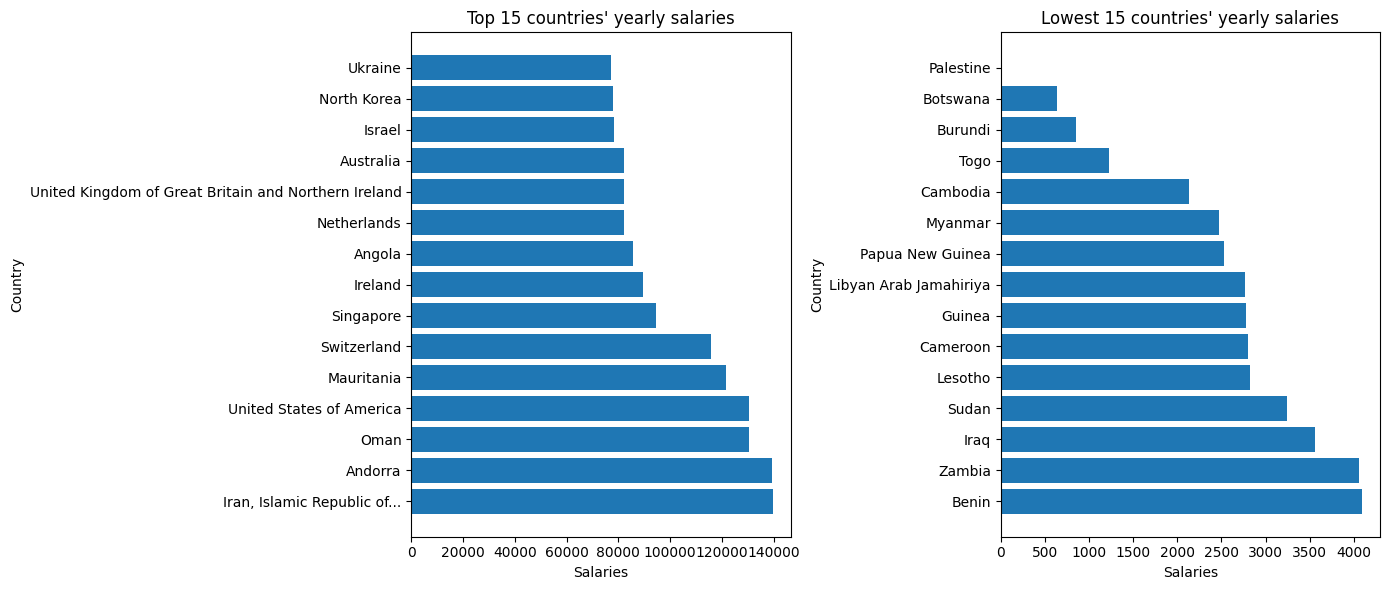

In [32]:
fig, ax = plt.subplots(1, 2 , figsize=(14, 6))
ax[0].set_title("Top 15 countries' yearly salaries")
ax[0].set_ylabel("Country")
ax[0].set_xlabel("Salaries")
ax[0].barh(top_15.index.tolist(), top_15.values.tolist())

ax[1].set_title("Lowest 15 countries' yearly salaries")
ax[1].set_ylabel("Country")
ax[1].set_xlabel("Salaries")
ax[1].barh(lowest_15.index.tolist(), lowest_15.values.tolist())

plt.tight_layout()
plt.show()

## 4. Developer Type vs Salary analysis
In this section, we analyze the average yearly salaries for different developer types. We group the data by DevType, calculate the mean salary, and visualize the top 15 and lowest 15 developer roles.

In [15]:
dev_sal_df = df.groupby("DevType")["ConvertedCompYearly"].mean().sort_values(ascending=False)
top_15_dev_sal = dev_sal_df.head(15)
lowest_15_dev_Sal = dev_sal_df.tail(15)

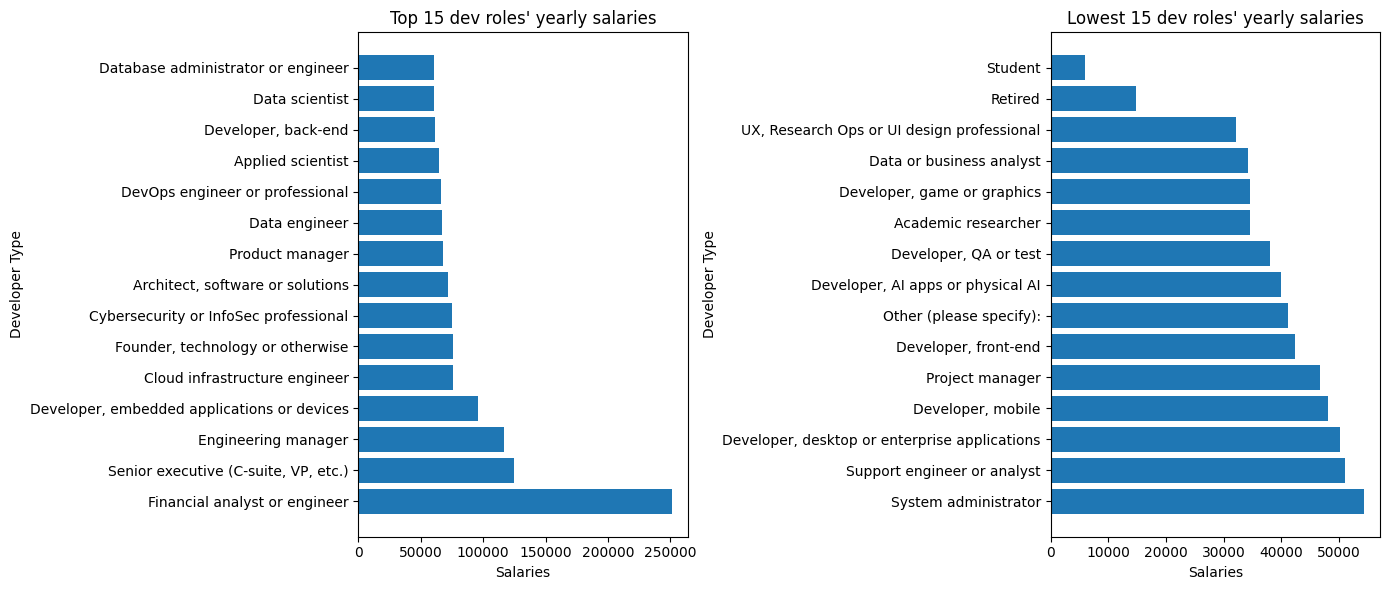

In [33]:
fig, ax = plt.subplots(1, 2 , figsize=(14, 6))
ax[0].set_title("Top 15 dev roles' yearly salaries")
ax[0].set_ylabel("Developer Type")
ax[0].set_xlabel("Salaries")
ax[0].barh(top_15_dev_sal.index.tolist(), top_15_dev_sal.values.tolist())

ax[1].set_title("Lowest 15 dev roles' yearly salaries")
ax[1].set_ylabel("Developer Type")
ax[1].set_xlabel("Salaries")
ax[1].barh(lowest_15_dev_Sal.index.tolist(), lowest_15_dev_Sal.values.tolist())

plt.tight_layout()
plt.show()

## 5. Salary Distribution and Additional Insights

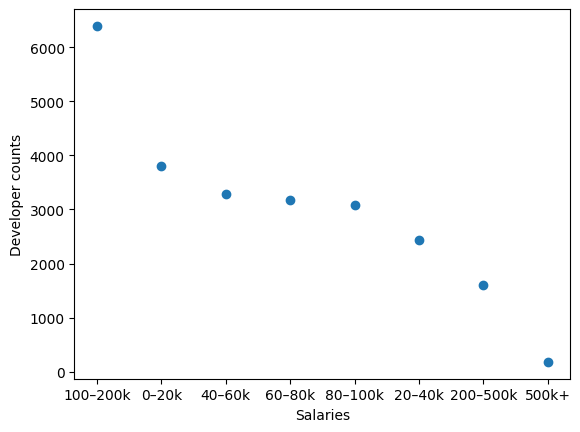

In [35]:
bins = [0, 20000, 40000, 60000, 80000, 100000, 200000, 500000, float("inf")]
labels = ["0–20k", "20–40k", "40–60k", "60–80k", "80–100k", "100–200k", "200–500k", "500k+"]

sal_ranges = pd.cut(df["ConvertedCompYearly"], bins=bins, labels=labels)
counts = sal_ranges.value_counts().sort_values(ascending=False)
plt.ylabel("Developer counts")
plt.xlabel("Salaries")
plt.scatter(counts.index.tolist(), counts.values.tolist())
plt.show()

## 6. Experience vs Salary Analysis
In this section, we explore the relationship between developers' years of work experience and their average yearly salaries. We group the data by work experience, filter for relevant ranges, and visualize the top 10 experience levels with a bar chart.

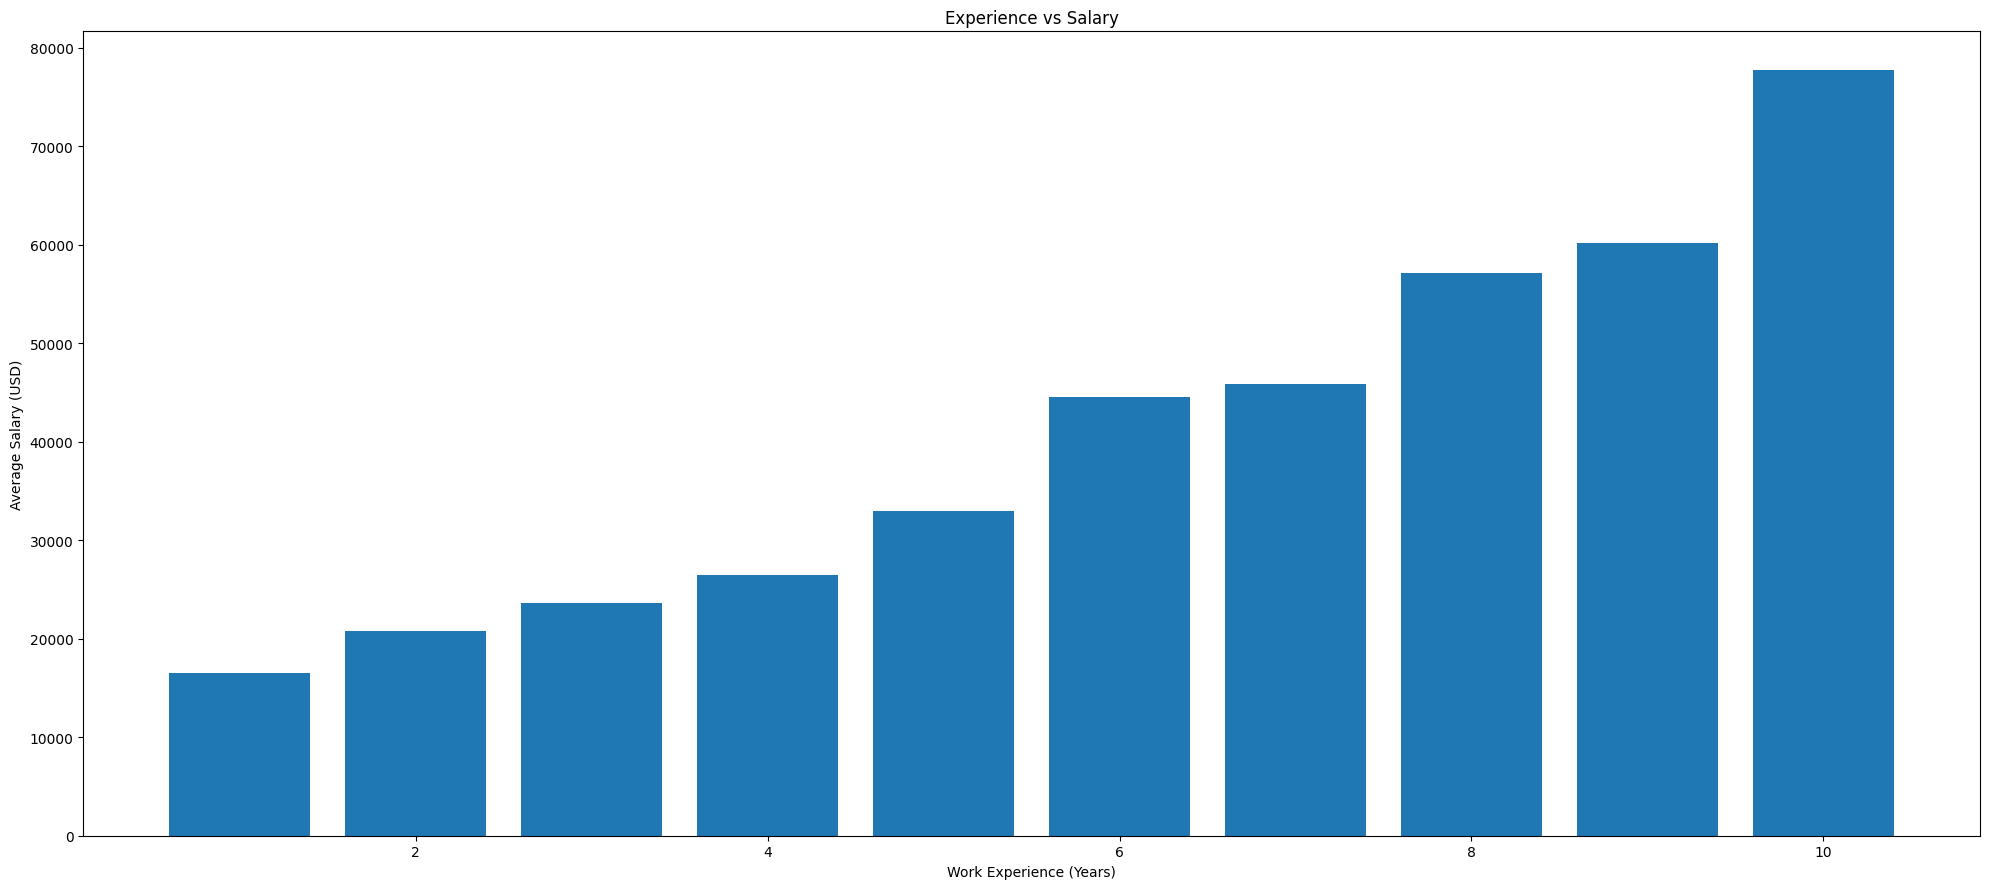

In [18]:
exp_sal = df.groupby("WorkExp")["ConvertedCompYearly"].mean()
work_exp_sal = exp_sal[(exp_sal.index != 0) & (exp_sal.index <= 40)]
plt.figure(figsize=(20, 9))
plt.title("Experience vs Salary")
plt.bar(work_exp_sal.head(10).index, work_exp_sal.head(10).values)
plt.xlabel("Work Experience (Years)")
plt.ylabel("Average Salary (USD)")
plt.tight_layout()
plt.show()

## 7. Technology Usage Analysis
Many columns contain multiple values separated by delimiters.
We split and explode these columns to analyze technology popularity.


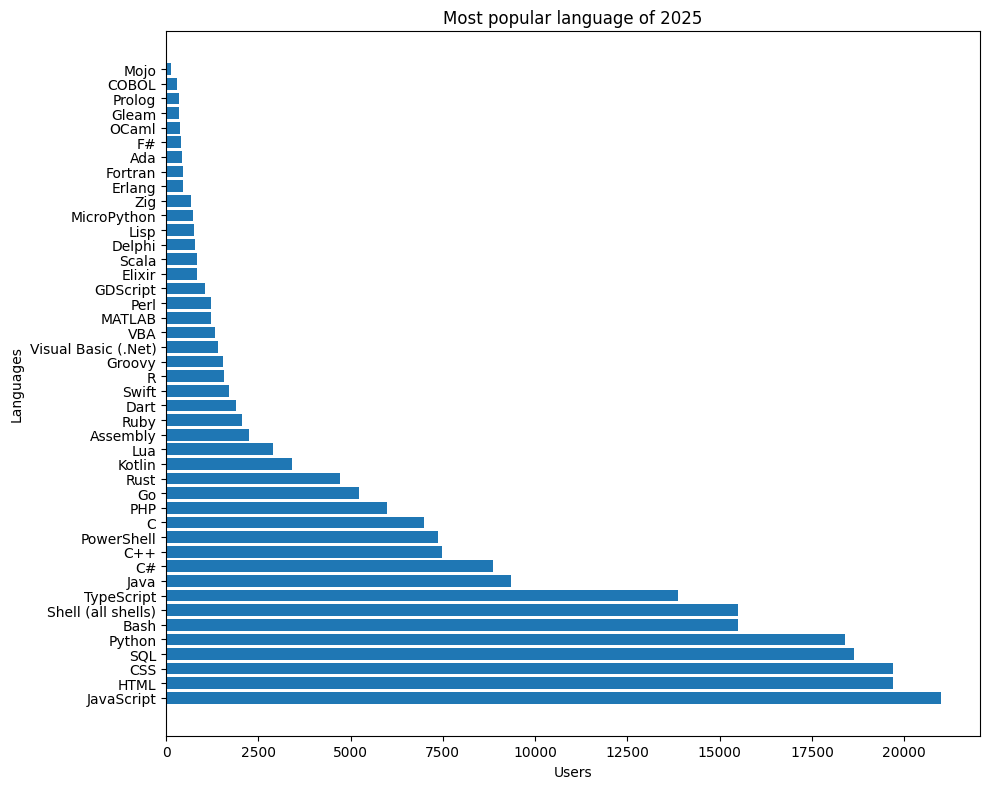

In [19]:
# language_uses_df = df["LanguageHaveWorkedWith"].value_counts()
# for i, j in zip(language_uses_df.index.tolist(), language_uses_df.values.tolist()):
#     langs = re.split(r"[;/]", i)
#     for lang in langs:
#         language_df.loc[len(language_df)] = [lang, j]
# language_df  
# do not run the upper code that is freaking inefficient

language_df = (
    df["LanguageHaveWorkedWith"]
    .str.split(r"[;/]")
    .explode()
    .str.strip()
    .value_counts()
    .reset_index()
)
language_df.columns = ["LanguageWorkedWith", "Users"]

plt.figure(figsize=(10, 8))
plt.title("Most popular language of 2025")
plt.xlabel("Users")
plt.ylabel("Languages")
plt.barh(language_df["LanguageWorkedWith"], language_df["Users"])
plt.tight_layout()
plt.tight_layout()
plt.show()

### Insight:
JavaScript and HTML dominate as the most widely used languages among developers.

## 8. Language vs Salary Analysis
In this section, we analyze the average yearly salaries associated with different programming languages. We filter the data to include only responses with valid salary information, explode the language columns, and compute the mean salary for each language. We then visualize the top 10 languages by average salary.

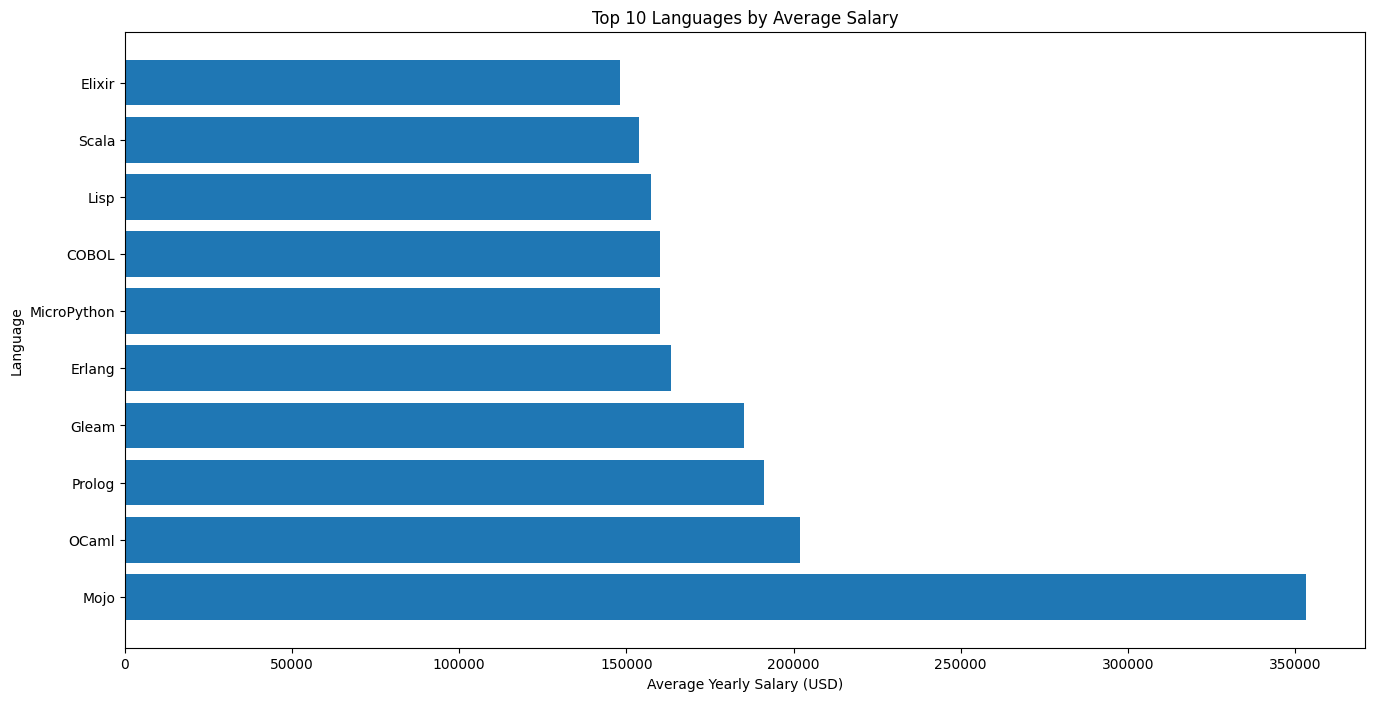

In [20]:
df2 = df[["LanguageHaveWorkedWith", "ConvertedCompYearly"]].dropna()
df2 = df2[df2["ConvertedCompYearly"] > 0]

lang_df = (
    df2.assign(
        LanguageHaveWorkedWith = df["LanguageHaveWorkedWith"].str.split(r"[\;]")
    ).explode("LanguageHaveWorkedWith")
)
lang_df["LanguageHaveWorkedWith"] = lang_df["LanguageHaveWorkedWith"].str.strip()

lang_salary = (
    lang_df.groupby("LanguageHaveWorkedWith")["ConvertedCompYearly"].mean()
)
top_10_sal_lang = lang_salary.nlargest(10)

plt.figure(figsize=(16,8))
plt.barh(top_10_sal_lang.index.tolist(), top_10_sal_lang.values.tolist())
plt.xlabel("Average Yearly Salary (USD)")
plt.ylabel("Language")
plt.title("Top 10 Languages by Average Salary")
plt.show()


## 9. Database Usage Analysis
In this section, we analyze the most commonly used databases among respondents. We split the 'DatabaseHaveWorkedWith' column by delimiters, explode it to count individual databases, and visualize the top 10 databases with a horizontal bar chart.

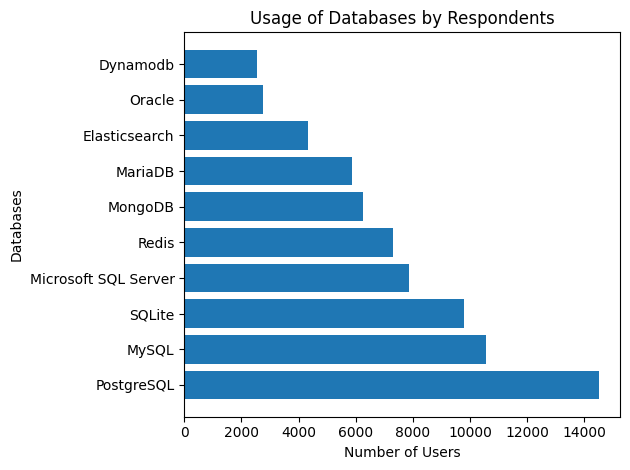

In [37]:
database_df = df["DatabaseHaveWorkedWith"].str.split(r"[\;]").explode().value_counts()
plt.barh(database_df.head(10).index.tolist(), database_df.head(10).values.tolist())
plt.title("Usage of Databases by Respondents")
plt.xlabel("Number of Users")
plt.ylabel("Databases")
plt.tight_layout()
plt.show()

## 10. AI Agent Usage Analysis
In this section, we analyze the most commonly used external AI agents among respondents. We split the 'AIAgentExternal' column by delimiters, explode it to count individual AI agents, and visualize the top 15 AI agents with a horizontal bar chart.

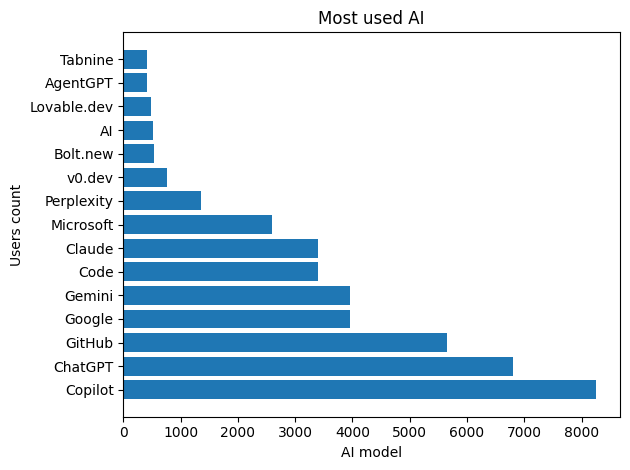

In [22]:
ai_df = (
	df["AIAgentExternal"]
	.dropna()
	.str.split(r"[;\s*]")
	.explode()
	.str.strip()
	.value_counts()
)
plt.title("Most used AI")
plt.xlabel("AI model")
plt.ylabel("Users count")
plt.barh(ai_df.head(15).index.tolist(), ai_df.head(15).values.tolist())
plt.tight_layout()
plt.show()

## 11. Platform Usage Analysis
In this section, we analyze the most commonly used platforms among respondents, comparing worked with and admired platforms. We split the 'PlatformHaveWorkedWith' and 'PlatformAdmired' columns by delimiters, explode them to count individual platforms, and visualize the top 15 platforms with a horizontal bar chart.

<Figure size 1600x600 with 0 Axes>

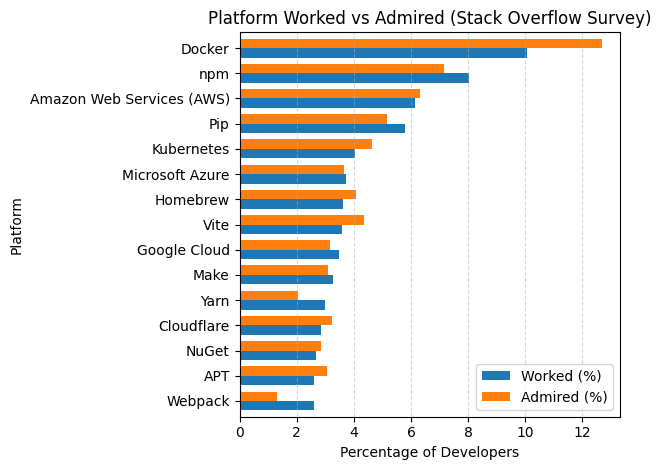

In [31]:
platform_worked_df = (
    df["PlatformHaveWorkedWith"]
    .dropna()
    .str.split(";")
    .explode()
    .str.strip()
    .value_counts(normalize=True) * 100
)

platform_admired_df = (
    df["PlatformAdmired"]
    .dropna()
    .str.split(";")
    .explode()
    .value_counts(normalize=True) *100
)

platform_df = pd.concat([platform_worked_df, platform_admired_df], axis="columns")
platform_df.columns = ["Worked (%)", "Admired (%)"]

platform_df = platform_df.sort_values("Worked (%)", ascending=False).head(15)

plt.figure(figsize=(16, 6))

platform_df.sort_values("Worked (%)").plot(
    kind="barh",
    width = 0.75
)

plt.title("Platform Worked vs Admired (Stack Overflow Survey)")
plt.xlabel("Percentage of Developers")
plt.ylabel("Platform")
plt.legend(loc="lower right")
plt.grid(axis="x", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


## 12. AI Agent Challenges Analysis
In this section, we analyze the challenges faced by developers when using AI agents. We process responses from columns related to agreement levels on various challenges, count the occurrences, and visualize the overall agreement percentages with a pie chart.

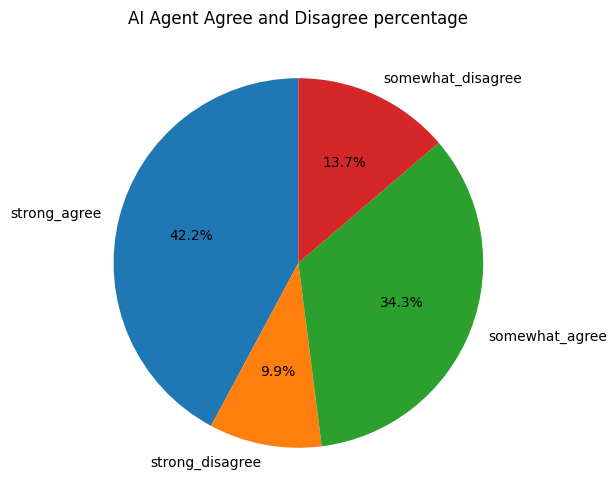

In [25]:
somewhat_agree_df = (
    df["AIAgentChallengesSomewhat agree"]
    .dropna()
    .str.split(";")
    .explode()
    .value_counts()
)

somewhat_disagree_df = (
    df["AIAgentChallengesSomewhat disagree"]
    .dropna()
    .str.split(";")
    .explode()
    .value_counts()
)

strongly_agree_df = (
    df["AIAgentChallengesStrongly agree"]
    .dropna()
    .str.split(";")
    .explode()
    .value_counts()
)

strongly_disagree_df = (
    df["AIAgentChallengesStrongly disagree"]
    .dropna()
    .str.split(";")
    .explode()
    .value_counts()
)

total = strongly_agree_df.sum() + strongly_disagree_df.sum() + somewhat_agree_df.sum() + somewhat_disagree_df.sum()

ai_dict = {"strong_agree" : (strongly_agree_df.sum() / total) * 100, 
           "strong_disagree" : (strongly_disagree_df.sum() / total) * 100, 
           "somewhat_agree" : (somewhat_agree_df.sum() / total) * 100,
           "somewhat_disagree" : (somewhat_disagree_df.sum() / total) * 100}

ai_df = pd.DataFrame.from_dict(ai_dict, orient="index", columns=["percentage"])

plt.figure(figsize=(6,6))
plt.pie(
    ai_df["percentage"],
    labels=ai_df.index,
    autopct="%.1f%%",
    startangle=90
)
plt.title("AI Agent Agree and Disagree percentage")
plt.show()



## 13. Demographics Analysis
This section explores age, education level, and professional background.


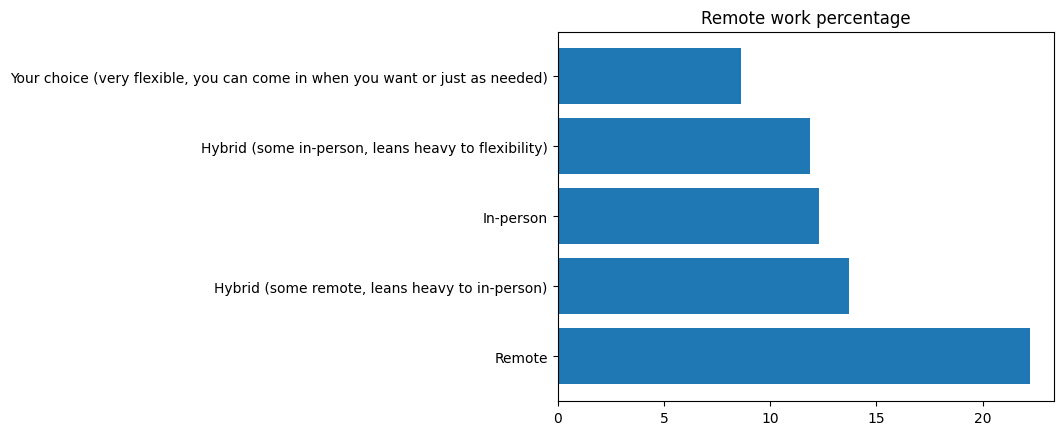

In [26]:
reomote_df = df["RemoteWork"].value_counts() / list(df.shape)[0] * 100

plt.title("Remote work percentage")
plt.barh(reomote_df.index.tolist(), reomote_df.values.tolist())
plt.show()

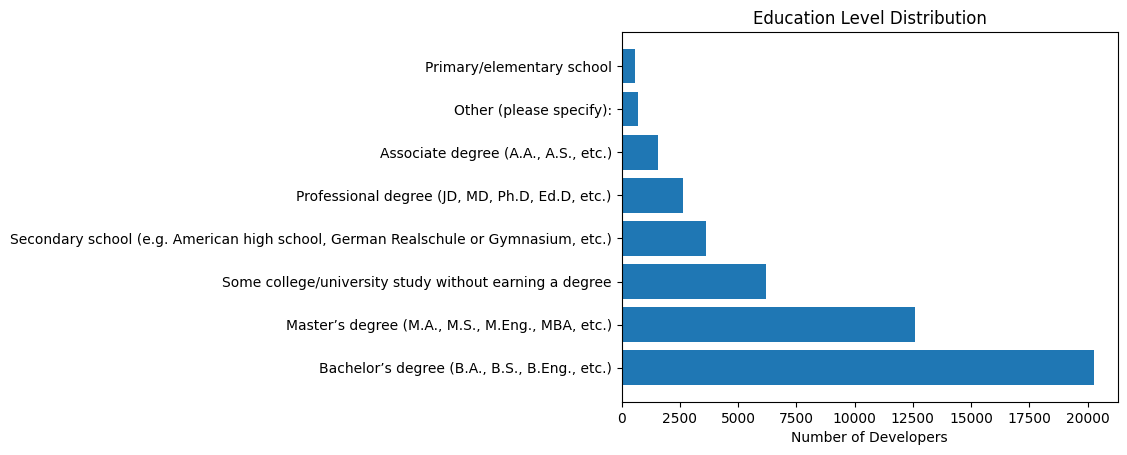

In [27]:
edu_counts = df["EdLevel"].value_counts()

plt.barh(edu_counts.index, edu_counts.values)
plt.xlabel("Number of Developers")
plt.title("Education Level Distribution")
plt.show()

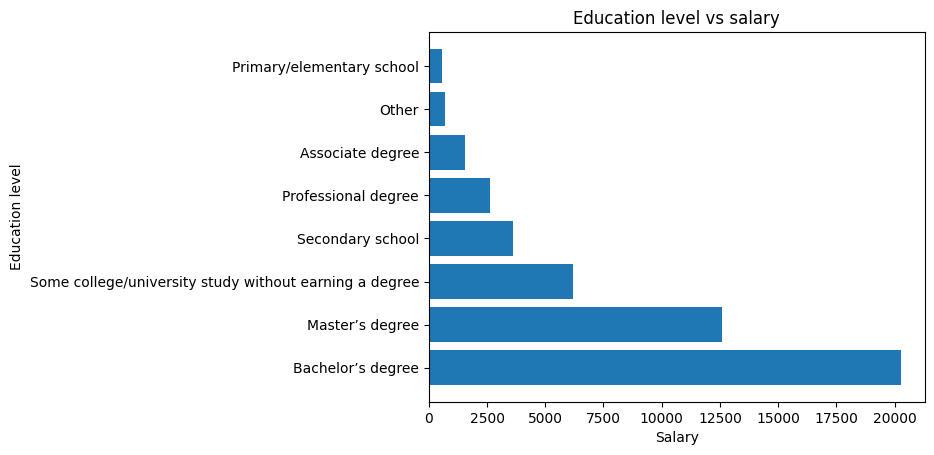

In [28]:
df["EdLevel_short"] = df["EdLevel"].str.split("(").str[0].str.strip()
Ed_df = df["EdLevel_short"].value_counts()

plt.title("Education level vs salary")
plt.ylabel("Education level")
plt.xlabel("Salary")
plt.barh(Ed_df.index, Ed_df.values)
plt.show()

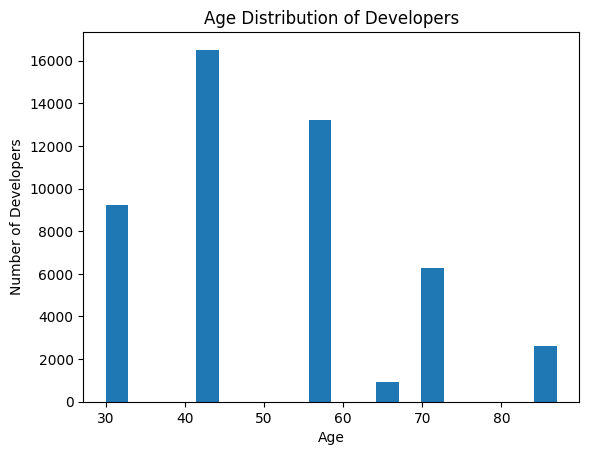

In [29]:
age = df["Age"].dropna()

plt.hist(age, bins=20)
plt.xlabel("Age")
plt.ylabel("Number of Developers")
plt.title("Age Distribution of Developers")
plt.show()


## 14. Correlation Analysis
We study relationships between salary, experience, and age using correlation matrices.


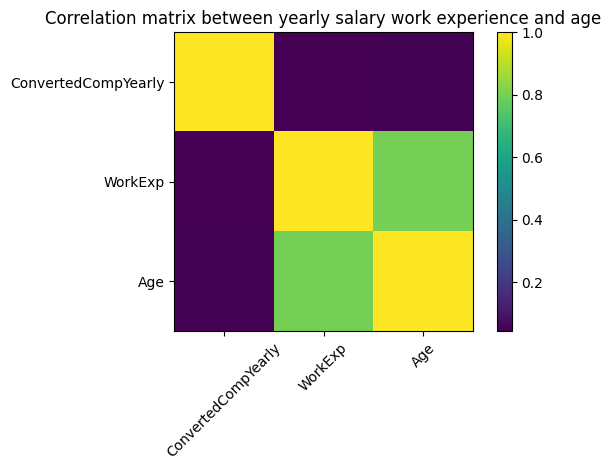

In [30]:
corr_matrix = df[[
    "ConvertedCompYearly",
    "WorkExp",
    "Age"
]].dropna().corr()

plt.imshow(corr_matrix)
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation = 45)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title("Correlation matrix between yearly salary work experience and age")
plt.tight_layout()
plt.show()

### Insight:
Age and work experience are strongly correlated, while salary shows weak correlation
with both, indicating external factors like country and role matter more.


## Final Conclusions

- Stack Overflow developers come from diverse backgrounds and regions.
- Salary alone is not strongly influenced by age or experience at a global level.
- Technology adoption shows strong preference toward a few dominant tools.
- External factors such as country, role, and industry likely drive salary differences.

This analysis demonstrates practical data-cleaning, aggregation, and visualization
skills using real-world survey data.
